In [10]:
# DBSCAN
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [11]:
# Descargar datos de precios del S&P 500
df = yf.download('^GSPC', start='2015-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [12]:
# Calcular el cambio porcentual diario
df['Pct_Change'] = df['Close'].pct_change() * 100

In [13]:
# calcular la volatilidad diaria (High - Low)
df['Volatility'] = df['High'] - df['Low']

In [14]:
# Limpiar datos eliminando NaNs
df.dropna(inplace=True)

In [15]:
# Normalizar los datos (DBSCAN es sensible a las escalas de datos)
scaler = StandardScaler()
X = scaler.fit_transform(df[['Pct_Change', 'Volatility']])

In [16]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X)

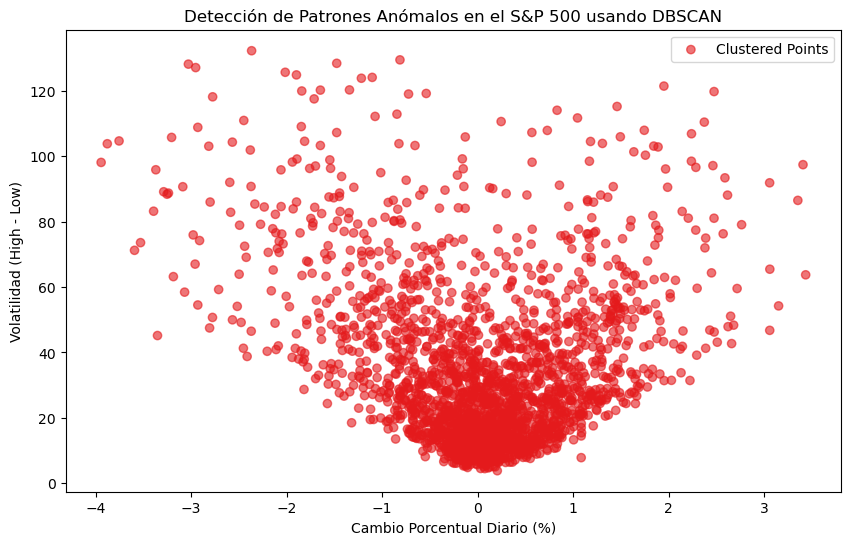

In [17]:
# Graficar los resultadoss, marcando las anamolias como 'ruido'
plt.figure(figsize=(10,6))

# Identificar los puntos de ruido (Cluster -1)
noise = df[df['Cluster'] == -1]
clusters = df[df['Cluster'] != -1]

plt.scatter(clusters['Pct_Change'], clusters['Volatility'], c=clusters['Cluster'], 
            cmap='Set1', label='Clustered Points', alpha=0.6)

plt.title('Detección de Patrones Anómalos en el S&P 500 usando DBSCAN')
plt.xlabel('Cambio Porcentual Diario (%)')
plt.ylabel('Volatilidad (High - Low)')
plt.legend()
plt.show()